<a href="https://colab.research.google.com/github/VINAY-GOPAL/EDA-and-hypothesis-testing-on-well-established-hospital-in-inda/blob/main/Apollo_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The data is about the well established hospital in india. It is the nation's top corporate hospital and is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at this hospital, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help hospital to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

# **Column Profiling:**

Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: This is the policy holder's gender, either male or female.

Viral Load: Viral load refers to the amount of virus in an infected person's blood.

Severity Level: This is an integer indicating how severe the patient is.

Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.

Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest.

Hospitalization charges: Individual medical costs billed to health insurance

# **Problem Statement:**

The company wants to know:

• Which variables are significant in predicting the reason for hospitalization for different regions

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.graphics.gofplots import qqplot,qqplot_2samples

In [91]:
df = pd.read_csv("data_a.csv")
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [92]:
df = df.drop({"Unnamed: 0"},axis=1)
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [93]:
df.shape

(1338, 7)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [95]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


We have the data of people from age 18-64.

In [96]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Their are more male than female in the data.

Their are more non-smokers than smokers in the data.

Their are more people from southeast region than remaining regions.

In [97]:
df["severity level"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [98]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [99]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [100]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [101]:
#Checking if any null values are present

(df.isnull().sum()/len(df)) * 100

age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

Their are no null values.

# **Outlier detection:**

In [102]:
num_col = ['age','viral load','severity level','hospitalization charges']

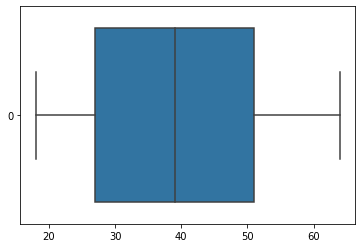

In [103]:
sns.boxplot(data=df['age'],orient='h')

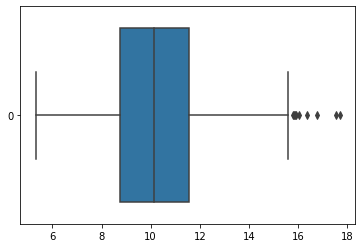

In [104]:
sns.boxplot(data=df['viral load'],orient='h')

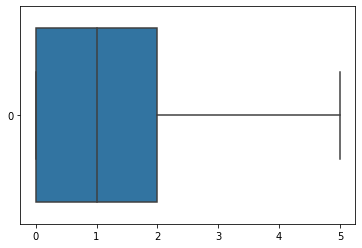

In [105]:
sns.boxplot(data=df['severity level'],orient='h')

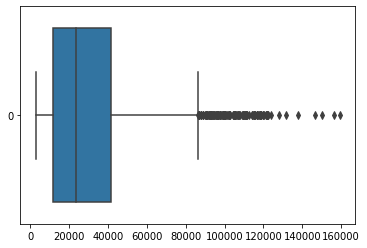

In [106]:
sns.boxplot(data=df['hospitalization charges'],orient='h')

By looking at boxplots we can see their are outliers only in viral load & hospitalization charges.
Let's find the percentage if outliers in these columns.

In [107]:
#Percentage of outliers in viral load

q_1 = df['viral load'].quantile(0.25)
q_1

8.7625

In [108]:
q_3 = df['viral load'].quantile(0.75)
q_3

11.5675

In [109]:
iqr_viral_load = q_3-q_1
iqr_viral_load

2.8050000000000015

In [110]:
lower = q_1-1.5*iqr_viral_load
upper = q_3+1.5*iqr_viral_load
print(lower,upper)

4.554999999999997 15.775000000000002


In [111]:
cas = df[(df["viral load"] < lower) | (df["viral load"] > upper)]
len(cas)

9

In [112]:
len(cas)/len(df)*100

0.672645739910314

Their are 0.67% outliers in viral load.

In [113]:
#Percentage of outliers in hospitalization charges

q_1h = df['hospitalization charges'].quantile(0.25)
q_1h

11851.0

In [114]:
q_3h = df['hospitalization charges'].quantile(0.75)
q_3h

41599.5

In [115]:
iqr_hc = q_3h-q_1h
iqr_hc

29748.5

In [116]:
lower = q_1-1.5*iqr_hc
upper = q_3+1.5*iqr_hc
print(lower,upper)

-44613.9875 44634.3175


In [117]:
casc = df[(df["hospitalization charges"] < lower) | (df["hospitalization charges"] > upper)]
len(casc)

317

In [118]:
len(casc)/len(df)*100

23.692077727952167

Their are 23.7% outliers in hospitalization charges.

# **Univariate Analysis:**

In [119]:
df["severity level"].unique()

array([0, 1, 3, 2, 5, 4])

In [120]:
df["severity level"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


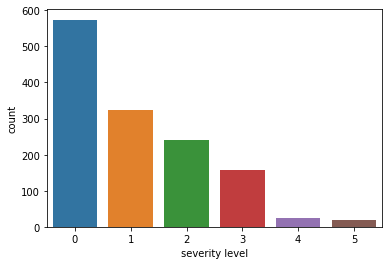

In [121]:
sns.countplot(df["severity level"])

In [122]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [123]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


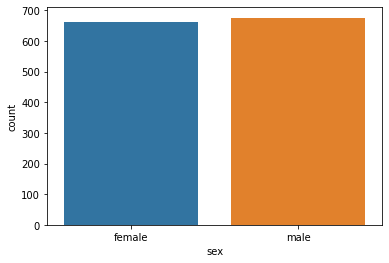

In [124]:
sns.countplot(df["sex"])

In [125]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [126]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


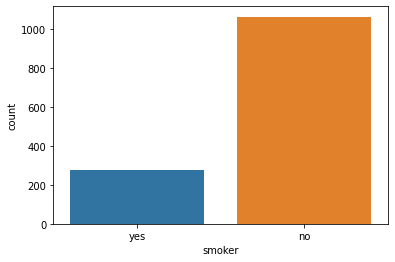

In [127]:
sns.countplot(df["smoker"])

In [128]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [129]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


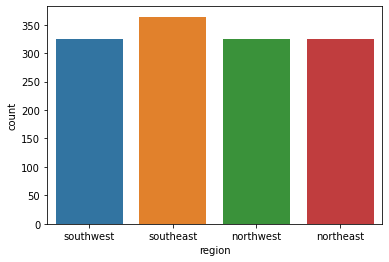

In [130]:
sns.countplot(df["region"])

# **Bi-Variate Analysis:**

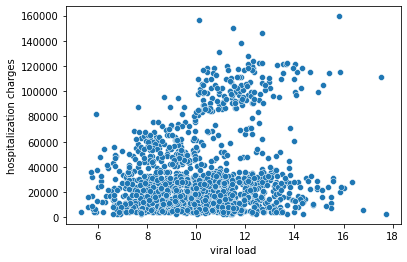

In [131]:
sns.scatterplot(x="viral load",y="hospitalization charges",data=df)

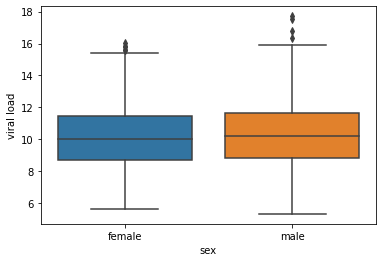

In [132]:
sns.boxplot(x="sex",y="viral load",data=df)

Males have slightly greater median of viral load than females.

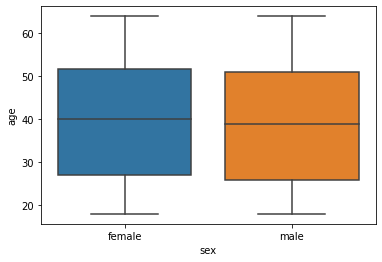

In [133]:
sns.boxplot(x="sex",y="age",data=df)

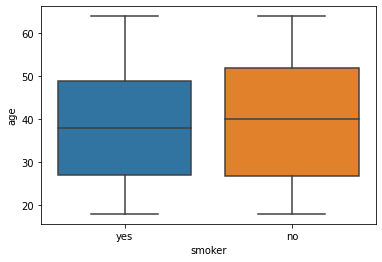

In [134]:
sns.boxplot(x="smoker",y="age",data=df)

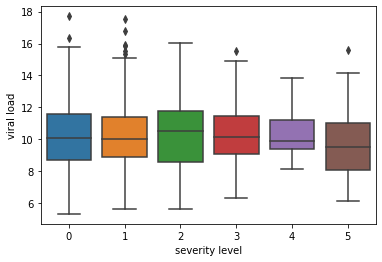

In [135]:
sns.boxplot(x="severity level",y="viral load",data=df)

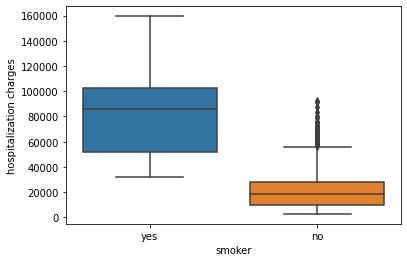

In [136]:
sns.boxplot(x="smoker",y="hospitalization charges",data=df)

smokers have high hospitalization charges than non smokers.

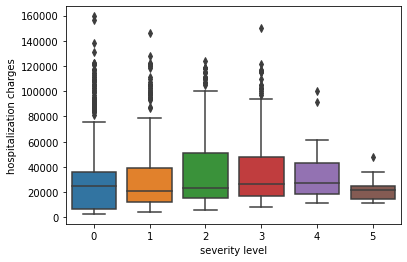

In [137]:
sns.boxplot(x="severity level",y="hospitalization charges",data=df)

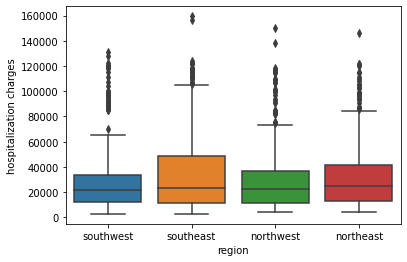

In [138]:
sns.boxplot(x="region",y="hospitalization charges",data=df)

All the regions have almost same median of hospitalization charges.

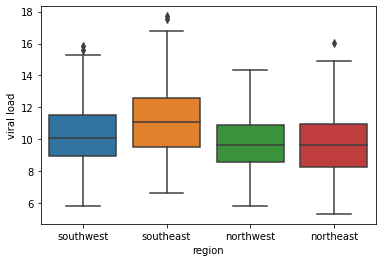

In [139]:
sns.boxplot(x="region",y="viral load",data=df)

In southeast region, median of viral load is more than remaining regions.

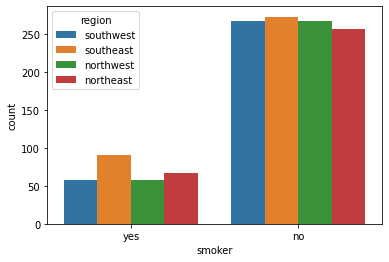

In [140]:
sns.countplot(x="smoker",hue="region",data=df)

In southeast region, there are more smokers than remaining regions after comes northeast.

# **Multi-Variate Analysis:**

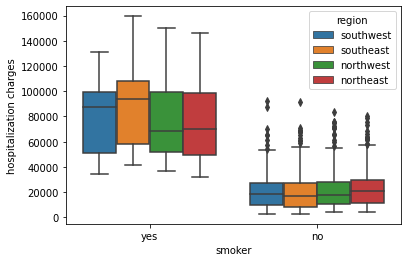

In [141]:
sns.boxplot(x="smoker",hue="region",y="hospitalization charges",data=df)

smokers in southeast region have high hospitalization charges than remaining regions. 

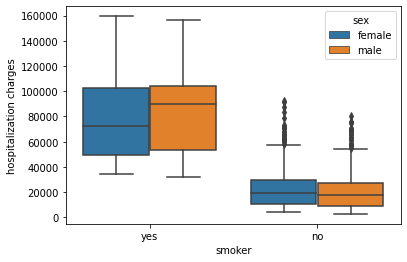

In [142]:
sns.boxplot(x="smoker",hue="sex",y="hospitalization charges",data=df)

Male smokers have high hospitalization charges than female smokers.

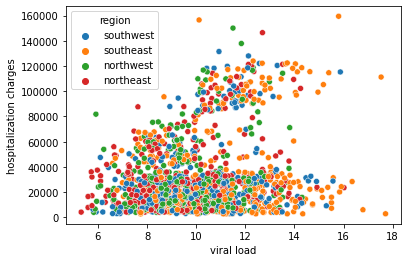

In [143]:
sns.scatterplot(x="viral load",hue="region",y="hospitalization charges",data=df)

In northeast & southeast region, as the viral load increases hospitalization charges also increases.

For southwest & northwest, most of the points lie between 0-4000.

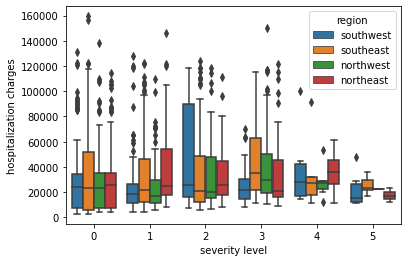

In [144]:
sns.boxplot(x="severity level",hue="region",y="hospitalization charges",data=df)

# **Statistical Analysis:**

**Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't?**

Let's set up null and alternate hypothesis:



H0: hospitalization charges for people who smoke has no effect than people who don't smoke. 

(mean of hospitalization charges for people who smoke =< mean of hospitalization charges for people who don't smoke)

Ha: hospitalization charges for people who smoke is greater than people who don't smoke. 

(mean of hospitalization charges for people who smoke > mean of hospitalization charges for people who don't smoke)

In [145]:
df_s = df[df["smoker"] == "yes"]
df_s[["smoker","hospitalization charges"]].head(5)

,smoker,hospitalization charges
0,yes,42212
11,yes,69522
14,yes,99029
19,yes,92094
23,yes,94255


In [146]:
len(df_s)

274

In [147]:
df_s["hospitalization charges"].mean()

80125.57299270073

In [148]:
df_ns = df[df["smoker"] == "no"]
df_ns[["smoker","hospitalization charges"]].head(5)

,smoker,hospitalization charges
1,no,4314
2,no,11124
3,no,54961
4,no,9667
5,no,9392


In [149]:
len(df_ns)

1064

In [150]:
df_ns["hospitalization charges"].mean()

21085.6757518797

As we can see mean of hospitalization charges for people who smoke is greater than people who don't. Let's see this is statistically significant or not.

In [151]:
#T-test Right tailed

ttest_ind(df_s['hospitalization charges'], df_ns['hospitalization charges'],alternative="greater")

Ttest_indResult(statistic=46.66489219013773, pvalue=4.1378462637459944e-283)

Let's set significance level(alpha) = 0.05.

As p-value is smaller than alpha, so we reject null hypothesis.

So, hospitalization charges for people who smoke is greater than people who don't smoke.

**Prove (or disprove) with statistical evidence that the viral load of females is different from that of males**

Let's set up null and alternate hypothesis:

Ho: viral load of females is not different from viral load of males

(mean of viral load of females = mean of viral load of males)

Ha: viral load of females is different from viral load of males

(mean of viral load of females != mean of viral load of males)

In [152]:
df_f = df[df["sex"] == "female"]
df_f[["sex","viral load"]].head(5)

,sex,viral load
0,female,9.30
5,female,8.58
6,female,11.15
7,female,9.25
9,female,8.61


In [153]:
len(df_f)

662

In [154]:
df_f["viral load"].mean()

10.12607250755287

In [155]:
df_m = df[df["sex"] == "male"]
df_m[["sex","viral load"]].head(5)

,sex,viral load
1,male,11.26
2,male,11.00
3,male,7.57
4,male,9.63
8,male,9.94


In [156]:
len(df_m)

676

In [157]:
df_m["viral load"].mean()

10.314423076923076

Mean of viral load of females and viral load of males are almost same. Let's see if it is statistically significant or not.

In [158]:
ttest_ind(df_f['viral load'], df_m['viral load'])

Ttest_indResult(statistic=-1.695711164450323, pvalue=0.0901735841670204)

Let's set significance level(alpha) = 0.05.

As p-value is greater than alpha, so we accept null hypothesis.

so, viral load of females is not different from viral load of males

**Is the proportion of smoking significantly different across different regions?**

Let's set up null and alternate hypothesis:

Ho: proportion of smoking same across different regions.

Ha: proportion of smoking different across different regions.

In [159]:
o = pd.crosstab(index=df["region"],columns=df["smoker"])
o

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [160]:
chi_stat, p_val, dff, exp_freq = chi2_contingency(o)

In [161]:
dff

3

In [162]:
p_val

0.06171954839170541

Let's set significance level(alpha) = 0.05.

As p-value is greater than alpha, so we accept null hypothesis.

So, proportion of smoking same across different regions.

**Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence.**

Let's set up null and alternate hypothesis:

H0:  mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is the same.

Ha: mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is not same.

In [165]:
df_w = df[df["sex"] == "female"]
df_w.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
7,37,female,no,northwest,9.25,3,18204
9,60,female,no,northwest,8.61,0,72308


In [166]:
df_w_0 = df_w[df_w['severity level'] == 0]
df_w_0.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
9,60,female,no,northwest,8.61,0,72308
11,62,female,yes,southeast,8.76,0,69522
13,56,female,no,southeast,13.27,0,27727


In [183]:
df_w_0["viral load"].mean()

10.120726643598616

In [167]:
df_w_1 = df_w[df_w['severity level'] == 1]
df_w_1.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
6,46,female,no,southeast,11.15,1,20601
16,52,female,no,northeast,10.26,1,26993
21,30,female,no,southwest,10.80,1,10374
23,34,female,yes,northeast,10.64,1,94255
58,53,female,yes,southeast,7.63,1,58112


In [184]:
df_w_1["viral load"].mean()

10.017468354430381

In [168]:
df_w_2 = df_w[df_w['severity level'] == 2]
df_w_2.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
27,55,female,no,northwest,10.92,2,30672
41,31,female,no,southeast,12.21,2,12374
43,37,female,no,southeast,10.27,2,15784
46,18,female,no,northeast,12.89,2,8483
51,21,female,no,northwest,11.21,2,8950


In [185]:
df_w_2["viral load"].mean()

10.216806722689073

We have to do ANOVA test but before doing ANOVA we have to check wether the ANOVA assumptions hold true or not.

Let's plot Q-Q plot.

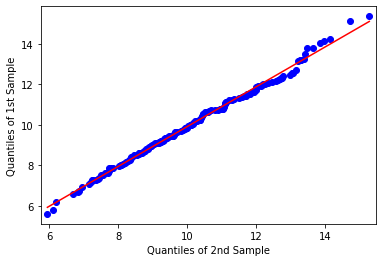

In [170]:
#QQ plot

qqplot_2samples(df_w_0['viral load'], df_w_1['viral load'],line='r')
plt.show()

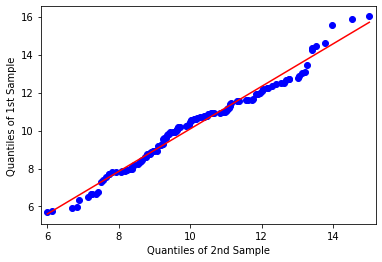

In [171]:
qqplot_2samples(df_w_0['viral load'], df_w_2['viral load'],line='r')
plt.show()

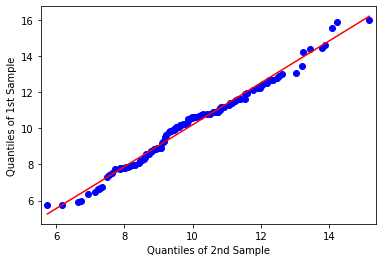

In [172]:
qqplot_2samples(df_w_1['viral load'], df_w_2['viral load'],line='r')
plt.show()

In [174]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import kstest

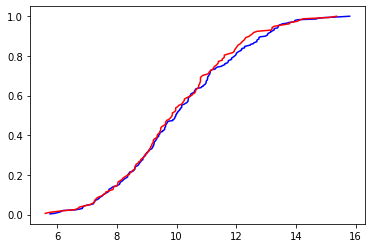

In [175]:
e1 = ECDF(df_w_0['viral load'])
e2 = ECDF(df_w_1['viral load'])

plt.plot(e1.x,e1.y,c='b')
plt.plot(e2.x,e2.y,c='r')

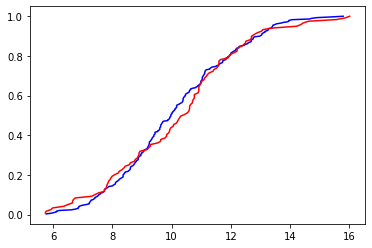

In [176]:
e1 = ECDF(df_w_0['viral load'])
e2 = ECDF(df_w_2['viral load'])

plt.plot(e1.x,e1.y,c='b')
plt.plot(e2.x,e2.y,c='r')

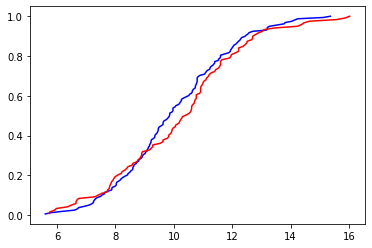

In [177]:
e1 = ECDF(df_w_1['viral load'])
e2 = ECDF(df_w_2['viral load'])

plt.plot(e1.x,e1.y,c='b')
plt.plot(e2.x,e2.y,c='r')

H0 : Two samples came from same distribution.


In [178]:
#ks test

kstest(df_w_0['viral load'],df_w_1['viral load'])

KstestResult(statistic=0.053260917174017784, pvalue=0.914368684017628)

As pvalue is greater than 0.05, we fail to feject null hypothesis.

In [179]:
kstest(df_w_0['viral load'],df_w_2['viral load'])

KstestResult(statistic=0.10479485912011864, pvalue=0.2900688183217234)

As pvalue is greater than 0.05, we fail to feject null hypothesis.

In [180]:
kstest(df_w_1['viral load'],df_w_2['viral load'])

KstestResult(statistic=0.10929688331028614, pvalue=0.3578627559023426)

As pvalue is greater than 0.05, we fail to feject null hypothesis.

So, we can see that assumptions of ANOVA hold true.

In [181]:
f_stat, p_val = f_oneway(df_w_0['viral load'], df_w_1['viral load'], df_w_2['viral load'])

In [182]:
p_val

0.7151189650367746

As pvalue is greater than 0.05, we fail to feject null hypothesis.

So, mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is the same.

# **Insights:**



*   Their are more male than female in the data.
*   Their are more non-smokers than smokers in the data.


*   Their are more people from southeast region than remaining regions.
*   Males have slightly greater median of viral load than females.


*   smokers have high hospitalization charges than non smokers.
*   All the regions have almost same median of hospitalization charges.


*   In southeast region, median of viral load is more than remaining regions.
*   In southeast region, there are more smokers than remaining regions after comes northeast.


*   smokers in southeast region have high hospitalization charges than remaining regions.
*   Male smokers have high hospitalization charges than female smokers.


*   In northeast & southeast region, as the viral load increases hospitalization charges also increases.


*   For southwest & northwest, most of the points lie between 0-4000.



















# **Recomendations:**



*   Hospitalization charges for people who smoke is greater than people who don't smoke. So, people who are smoking have high chances of hospitalization. We can see what type of health problems are commom in smoking people and keep those medicines more in pharmacy.

*   Since, people who are smoking have high chances of hospitalization. Southeast region have more smokers than remaining regions. So we can open more number of hospital and pharmacy branches in that region.

